In [60]:
import nltk
import re
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure required NLTK packages are downloaded
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Step 1: Scrape text content from target URLs
def scrape_text(url):
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.content, 'html.parser')
        article = soup.find('article') or soup.find('main')
        return article.get_text() if article else soup.get_text()
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return ""

urls = [
    "https://www.travejar.com/blog/",
    "https://morueats.com/blogs/",
    "https://www.thestar.com.my",
    "https://www.eatdrink.my/kl/",
    "https://klfoodie.com",
    "https://www.bangsarbabe.com",
    "https://www.kenhuntfood.com/",
    "https://www.theyumlist.net/",
    "https://www.malaysianfoodie.com",
    "https://penangfoodie.com/",
    "https://themalaysiankitchen.com/",
    "https://www.migrationology.com/kuala-lumpur-travel-guide-food-lovers/",
    "https://www.marionskitchen.com/category/malaysian-cuisine/",
    "https://www.seriouseats.com/malaysian-recipes-5117240",
    "https://hungrygowhere.com/tag/malaysia/",
    "https://www.bibzeats.com/",
]

corpus = " ".join([scrape_text(url) for url in urls])

# Step 2: Clean and tokenize
custom_stopwords = set([
    "malaysia", "malaysian", "australia", "australian", "connect", "market", "consumer", "consumers",
    "growth", "trend", "trends", "year", "global", "industry", "business", "development", "health",
    "programme", "visit", "testimonials", "export", "import", "spending", "rate", "service", "workshops",
    "team", "foodservice", "driving", "demand", "insights", "support", "data", "analysis", "clients",
    "brand", "brands", "companies", "category", "categories", "economy", "pandemic", "organic",
    "sustainable", "report", "study", "publication", "journal", "population", "income", "agreement",
    "tariff", "price", "free", "good", "used", "found", "offering", "impact", "coming", "prepared",
    "already", "especially", "continue", "include", "supporting", "set", "higher", "products", "meal"
])

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english")).union(custom_stopwords)
    filtered = [w for w in tokens if w not in stop_words and len(w) > 2]
    return filtered

tokens = clean_text(corpus)

# Step 3: Lemmatize
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(w) for w in tokens]

# Step 4: Optional whitelist for food-specific focus
food_keywords = set([
    # Existing
    'plantbased', 'vegan', 'mala', 'matcha', 'nasi', 'lemak', 'ayam', 'sambal', 'oat', 'bubble',
    'tea', 'salted', 'egg', 'glutenfree', 'keto', 'tofu', 'durian', 'kopi', 'noodles', 'biryani',
    'curry', 'rendang', 'satay', 'hawker', 'bak', 'kueh', 'soup', 'fried', 'steamed', 'spicy',
    'local', 'fusion', 'sugar', 'snacks', 'herbs', 'tempeh', 'jackfruit', 'mushroom', 'grains',
    'meal', 'greens', 'fruit',

    # Expanded traditional
    'char kway teow', 'roti canai', 'maggi goreng', 'asam laksa', 'cendol', 'mee goreng',
    'ikan bakar', 'nasi kerabu', 'laksa johor',

    # Ingredients
    'belacan', 'gula melaka', 'pandan', 'lemongrass', 'tamarind', 'ikan bilis',

    # Snacks & desserts
    'onde-onde', 'pisang goreng', 'ice kacang', 'ais batu campur',

    # Drinks
    'milo dinosaur', 'teh tarik', 'bandung', 'white coffee',

    # Preparation styles
    'deepfried', 'grilled', 'braised', 'stirfried'
])

tokens = [w for w in tokens if w in food_keywords]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
from collections import Counter

word_freq = Counter(tokens)
print(word_freq.most_common(30))

[('tea', 10), ('nasi', 10), ('local', 9), ('fried', 9), ('spicy', 8), ('curry', 8), ('lemak', 5), ('soup', 4), ('bak', 4), ('vegan', 3), ('meal', 3), ('fusion', 3), ('fruit', 2), ('cendol', 2), ('satay', 2), ('matcha', 1), ('pandan', 1), ('braised', 1), ('grilled', 1), ('ayam', 1), ('stirfried', 1), ('durian', 1), ('egg', 1), ('hawker', 1), ('kopi', 1)]


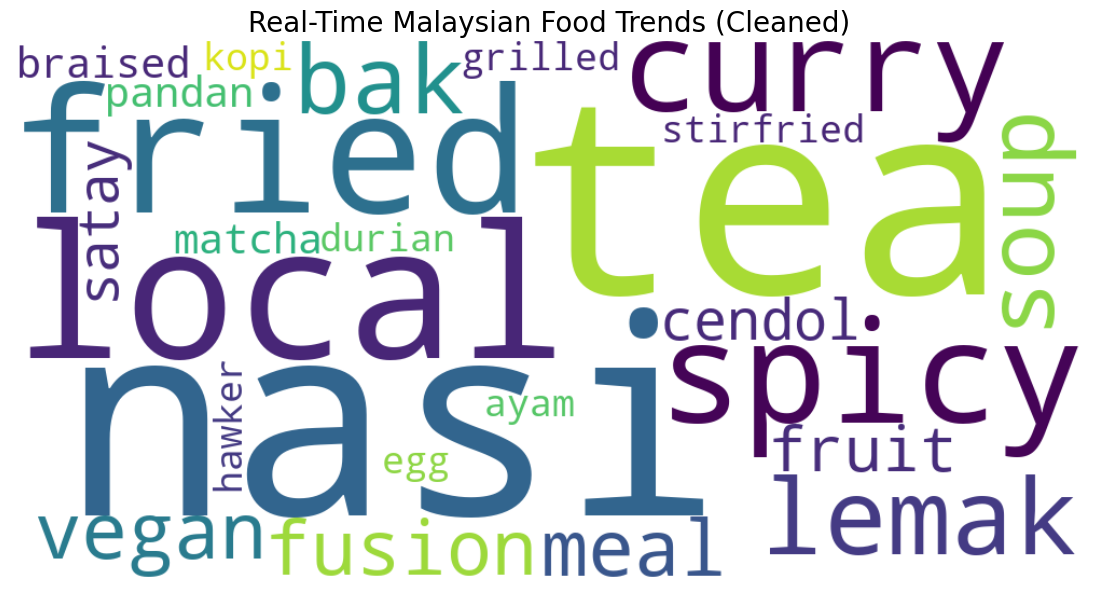

In [64]:
# Step 5: Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(" ".join(tokens))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Real-Time Malaysian Food Trends (Cleaned)", fontsize=20)
plt.show()